In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_c = [30,47.2,70.2,77.4,36.3,20.6,18.1,21.4,22,25.4,27.1,40.3,57,76.6,52.3,19.5,11.2,7.6,14.6,16.2,24.7]
y_l = [4,6.1,9.8,35.2,59.4,41.7,19,13,8.3,9.1,7.4,8,12.3,19.5,45.7,51.1,29.7,15.8,9.7,10.1,8.6]
t = np.arange(1900,1922,1)
t = np.delete(t,19)
print(np.mean(x_c),np.mean(y_l))

34.080952381 20.1666666667


In [3]:
a1 = np.log(40.3/27.1)
b1 = - np.log(19./41.7)
a2 = a1/np.mean(y_l)
b2 = b1/np.mean(x_c)

print(a1,a2,b1,b2)

0.396817741067 0.0196769127802 0.786062149638 0.0230645593718


In [4]:
def RK4(f,x,t,h):
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x = x + (k1+2.*k2+2.*k3+k4)/6.
    return x

def PredPrey(r,t):
    x,y = r[0], r[1]
    fxd = x*(a1 - a2*y)
    fyd = -y*(b1 - b2*x)
    return np.array([fxd,fyd])

In [5]:
N = 10000
tf = 1922.
t0 = 1900.
h = (tf - t0)/N
x0,y0 = x_c[0],y_l[0] #Condiciones Iniciales
X,Y,T= [x0],[y0],[t0]

In [6]:
r = np.array([x0,y0])
for i in range(1,N+1):
    r = RK4(PredPrey,r,t0,h)
    t0 += h
    X.append(r[0]),Y.append(r[1]),T.append(t0)

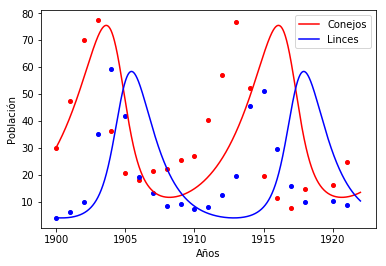

In [7]:
plt.plot(t,x_c,'ro',markersize=4)
plt.plot(t,y_l,'bo',markersize=4)
plt.plot(T,X,'r',label = 'Conejos')
plt.plot(T,Y,'b',label = 'Linces')
plt.xlabel('Años')
plt.ylabel('Población')
plt.legend()
plt.show()

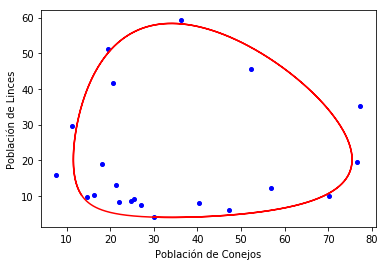

In [8]:
plt.plot(x_c,y_l,'bo', markersize=4)
plt.plot(X,Y,'r')
plt.xlabel('Población de Conejos')
plt.ylabel('Población de Linces')
plt.show()